In [1]:
import spectral_analysis as sa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import floor

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

# Gauss-Hermite 1

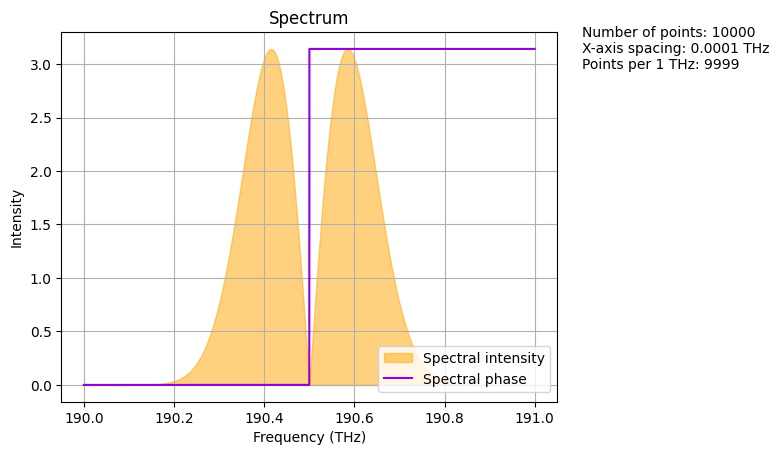

In [2]:
length = 10000

pulse = sa.hermitian_pulse(pol_num = 1,
                           bandwidth = [190, 191],
                           centre = 190.5,
                           FWHM = 0.2,
                           num = length)

eps = 1e-5

phase = np.concatenate([np.zeros(floor(length/2))+eps, np.pi*np.ones(floor(length/2)) + eps])
pulse.Y = np.abs(pulse.Y) *np.exp(1j*phase)
sa.plot(pulse, what_to_plot = "trigonometric")

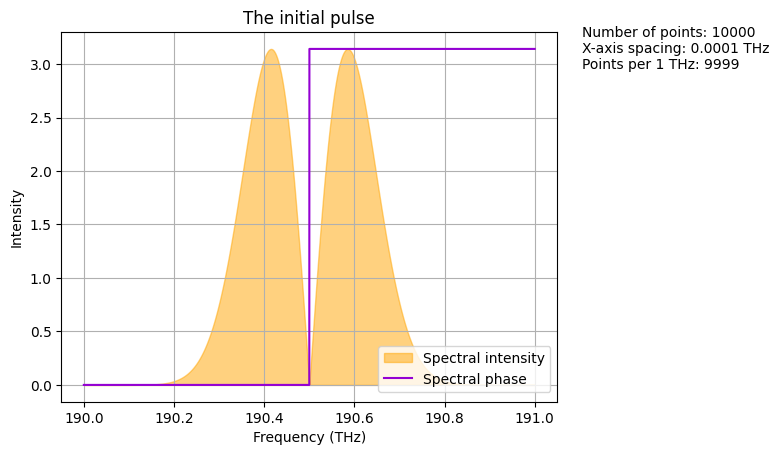

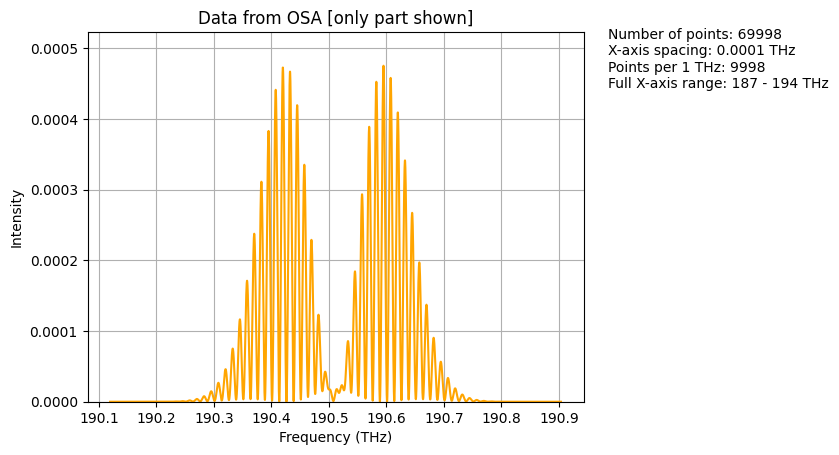

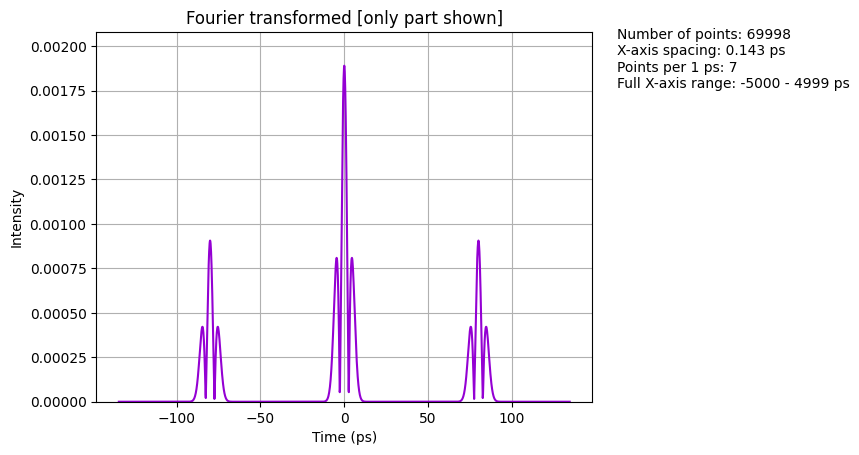

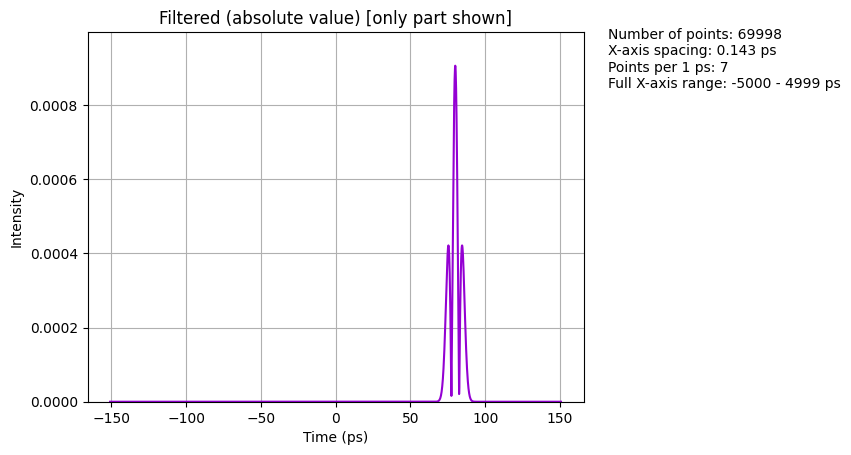

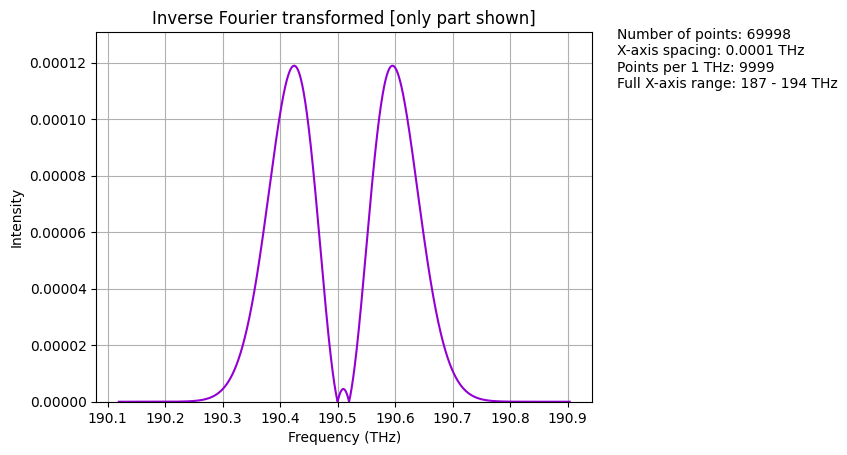

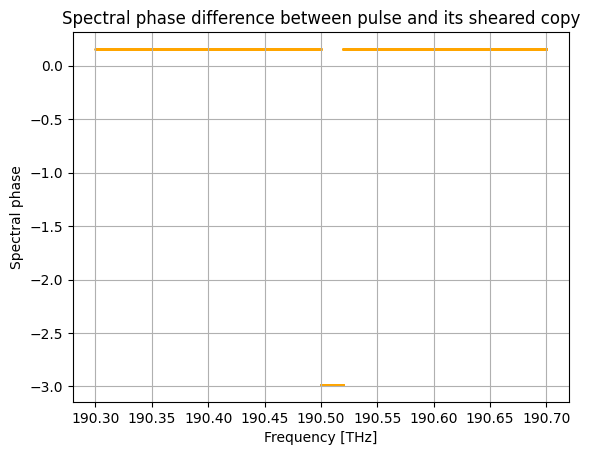

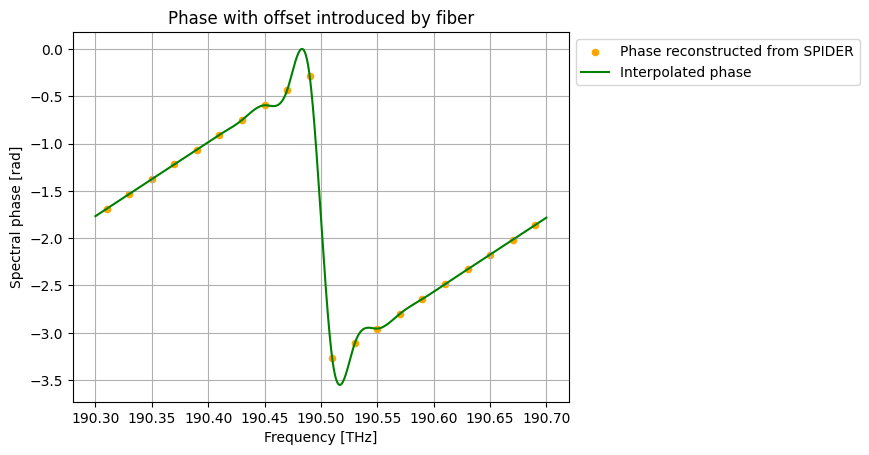

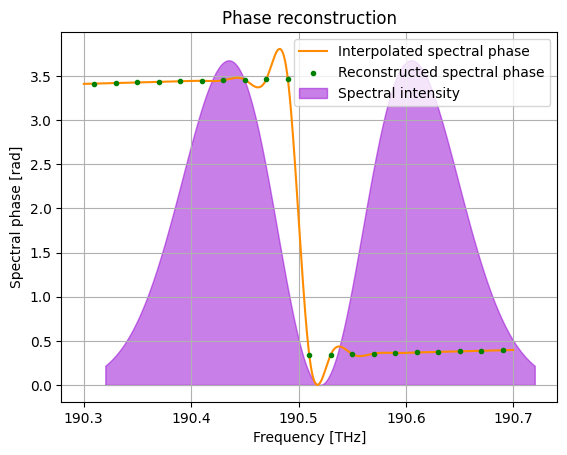

In [3]:
# prepare the beam

zero_pulse = pulse.copy()
zero_pulse.Y = zero_pulse.Y*0
the_beam = sa.beam(pulse, zero_pulse)

sa.plot(the_beam.ver, what_to_plot = "trigonometric", title = "The initial pulse")

# simulation

for i in range(2):
    a_beam = the_beam.copy()
    a_beam.rotate(np.pi/4)
    a_beam.delay("ver", 80)
    if i == 0:
        a_beam.shear("ver", 0.02)
    a_beam.rotate(np.pi/4)
    a_beam.polarizer("ver")
    if i == 0:
        p_spectrum = a_beam.OSA(show_plot = False)
    elif i == 1:
        t_spectrum = a_beam.OSA(show_plot = False)
#sa.plot(a_beam.ver, what_to_plot = "trigonometric", title = "Spectrum with temporal phase")
# spider

phase_diff = sa.spider(phase_spectrum = p_spectrum,
          temporal_spectrum = t_spectrum,
          shear = 0.02,
          plot_steps = True,
          plot_phase_inter = True,
          phase_borders = [190.3, 190.7],
          #forced_delay = 80,
          temp_phase_param = -1.5,
          what_to_return="phase_diff")

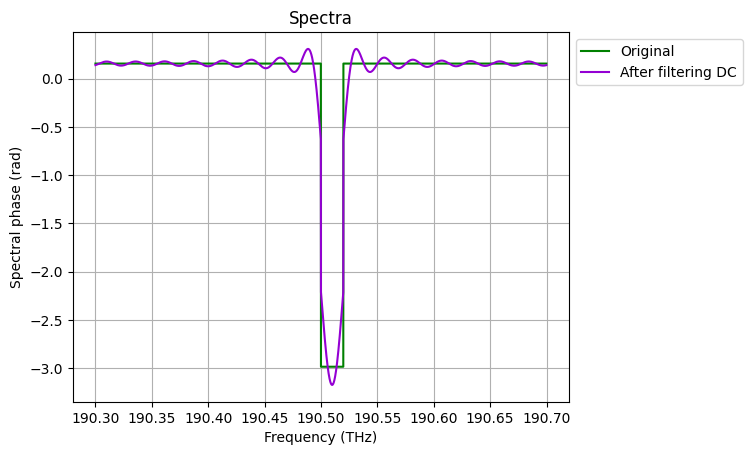

In [4]:
phase_diff_safe = phase_diff.copy()

phase_diff_safe.fourier()
#phase_diff_safe.replace_with_zeros(start = 40)
phase_diff_safe.replace_with_zeros(end = -40)
phase_diff_safe.inv_fourier()
phase_diff_safe.X += 190.5


sa.compare_plots([phase_diff, phase_diff_safe], colors = ["green", "darkviolet"], legend = ["Original", "After filtering DC"])

# Gauss-Hermite 7

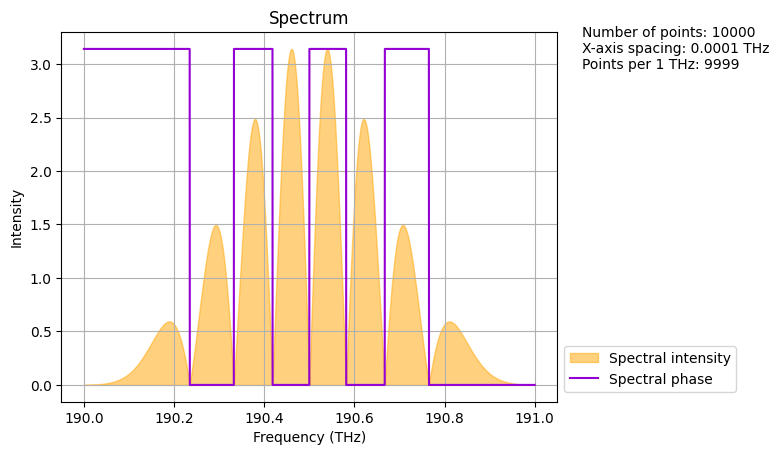

In [5]:
length = 10000

pulse = sa.hermitian_pulse(pol_num = 7,
                           bandwidth = [190, 191],
                           centre = 190.5,
                           FWHM = 0.2,
                           num = length)

eps = 1e-5
pulse.Y = pulse.Y * np.exp(-1j*eps)

sa.plot(pulse, what_to_plot = "trigonometric")

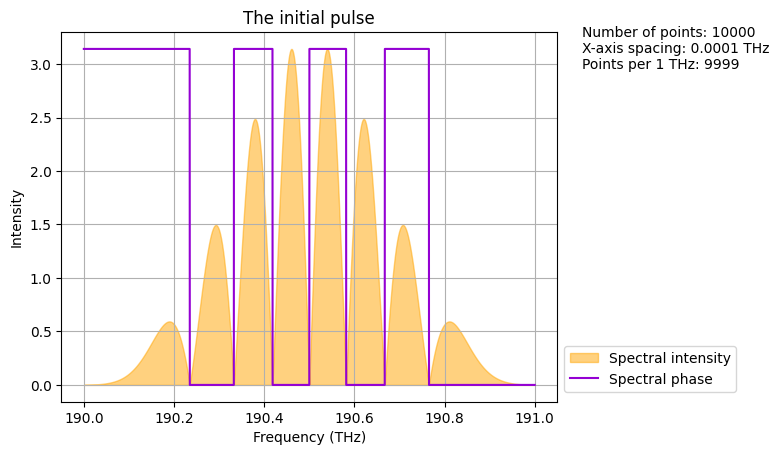

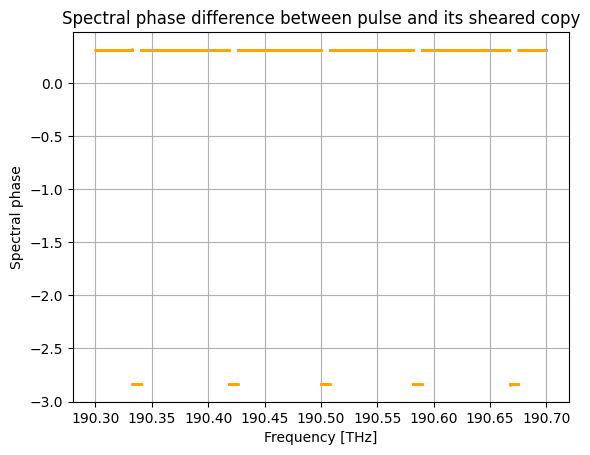

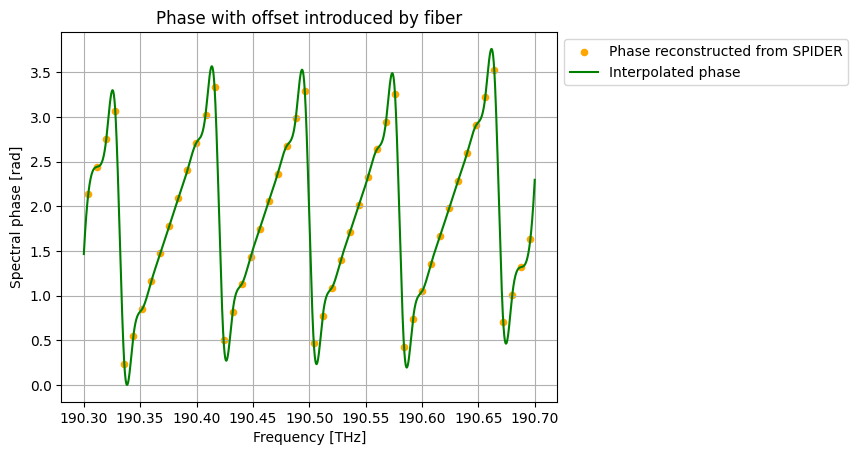

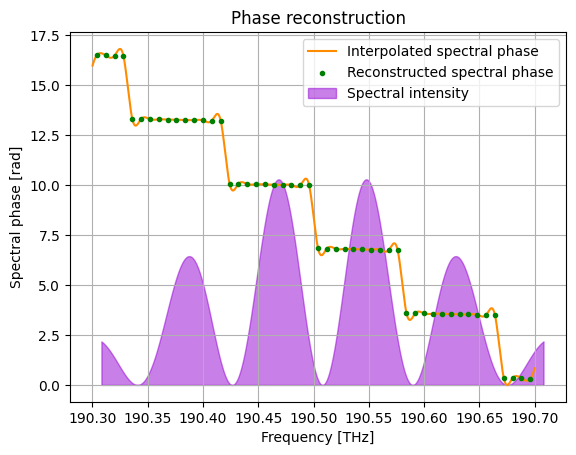

In [6]:
# prepare the beam

zero_pulse = pulse.copy()
zero_pulse.Y = zero_pulse.Y*0
the_beam = sa.beam(pulse, zero_pulse)

sa.plot(the_beam.ver, what_to_plot = "trigonometric", title = "The initial pulse")

# simulation

for i in range(2):
    a_beam = the_beam.copy()
    a_beam.rotate(np.pi/4)
    a_beam.delay("ver", 80)
    if i == 0:
        a_beam.shear("ver", 0.008)
    a_beam.rotate(np.pi/4)
    a_beam.polarizer("ver")
    if i == 0:
        p_spectrum = a_beam.OSA(show_plot = False)
    elif i == 1:
        t_spectrum = a_beam.OSA(show_plot = False)
#sa.plot(a_beam.ver, what_to_plot = "trigonometric", title = "Spectrum with temporal phase")
# spider

IFT = sa.spider(phase_spectrum = p_spectrum,
          temporal_spectrum = t_spectrum,
          shear = 0.008,
          plot_steps = False,
          plot_phase_inter = True,
          phase_borders = [190.3, 190.7],
          #forced_delay = 80,
          temp_phase_param = -8)